First of all,we import the neccesary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next we load the data..

In [2]:
data=pd.read_csv("churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.shape

(7043, 21)



The Dataframe has 7043 rows with 21 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can see from the above that there are no missing values..

Next we go on and get unique count for each variable..

In [6]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


From the above, we will not require the first attribute as it is specific to a customer.

In [7]:

data=data.drop(['customerID'],axis = 1)

In [8]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate too the 'churn' status.

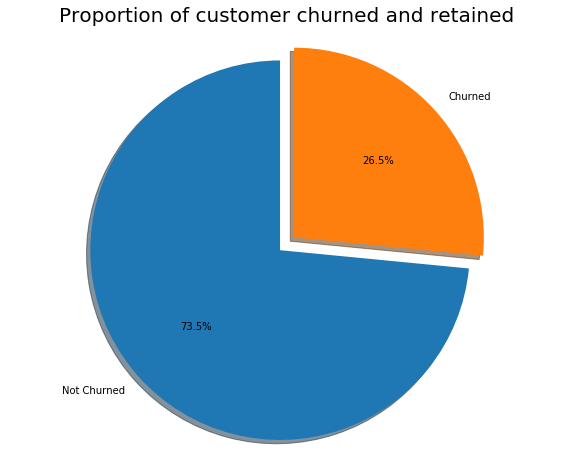

In [9]:
sizes=[data.Churn[data["Churn"]=='No'].count(),data.Churn[data["Churn"]=='Yes'].count()]
labels="Not Churned","Churned"
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


So about 26.5% of the customers have churned.


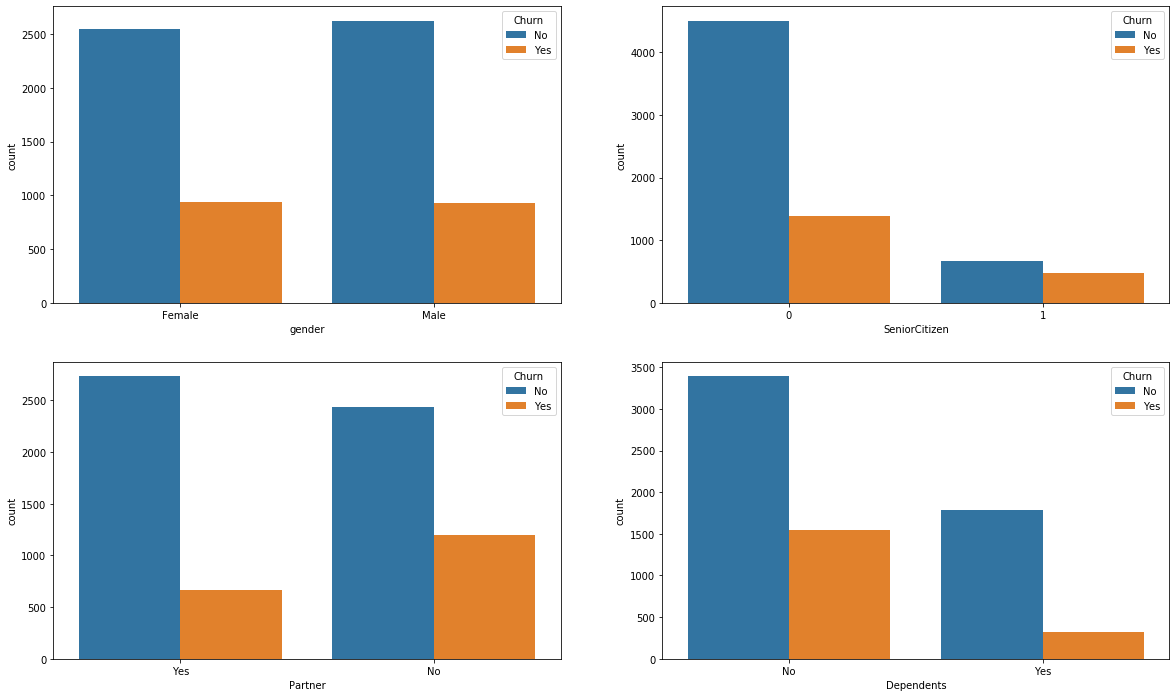

In [10]:
    # We first review the 'Status' relation with categorical variables
    import seaborn as sns
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='gender',hue = 'Churn',data = data, ax=axarr[0][0])
    sns.countplot(x='SeniorCitizen',hue = 'Churn',data = data, ax=axarr[0][1])
    sns.countplot(x='Partner',hue='Churn',data=data,ax=axarr[1][0])
    sns.countplot(x='Dependents',hue='Churn',data=data,ax=axarr[1][1])

The proportion of female customers churning is same as  that of the male customers..
The proportion of senior citizens churning is less.
Also it can be seen that those employees who are not partners churn more..
And from the last plot it can be seen that those who are not dependents churn less

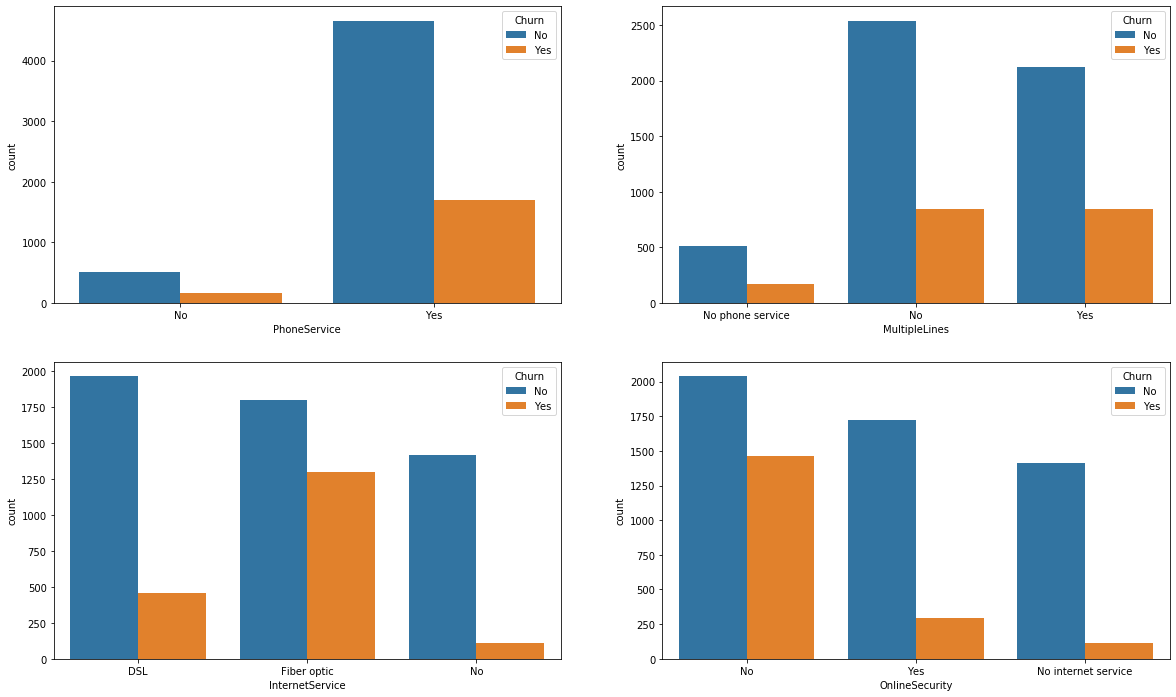

In [11]:
    import seaborn as sns
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='PhoneService',hue = 'Churn',data = data, ax=axarr[0][0])
    sns.countplot(x='MultipleLines',hue = 'Churn',data = data, ax=axarr[0][1])
    sns.countplot(x='InternetService',hue='Churn',data=data,ax=axarr[1][0])
    sns.countplot(x='OnlineSecurity',hue='Churn',data=data,ax=axarr[1][1])

From the above countplots we see that those who have taken phoneservices have churned more in comparison to those who have 
not take phoneservice.Also,we can see the proportion of people who have taken no phone service have churned less in comparison to
the others.Again in the internnet service section,we can see that those people who have taken no internet service churn 
less.

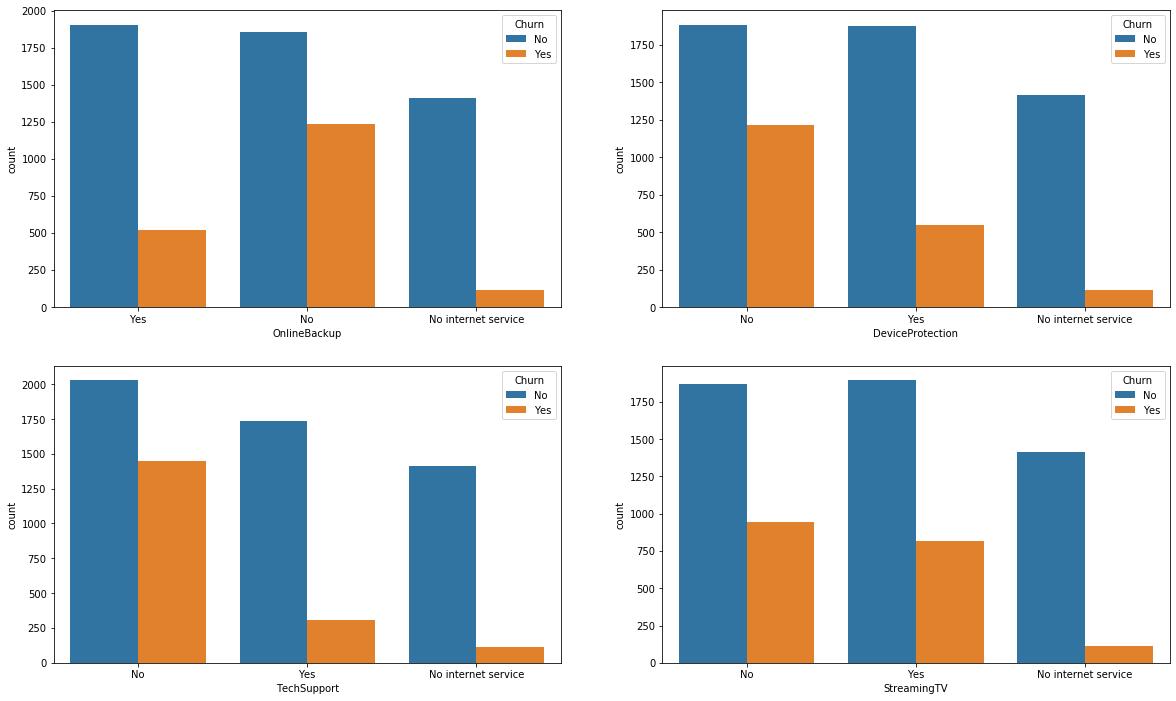

In [12]:
    import seaborn as sns
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='OnlineBackup',hue = 'Churn',data = data, ax=axarr[0][0])
    sns.countplot(x='DeviceProtection',hue = 'Churn',data = data, ax=axarr[0][1])
    sns.countplot(x='TechSupport',hue='Churn',data=data,ax=axarr[1][0])
    sns.countplot(x='StreamingTV',hue='Churn',data=data,ax=axarr[1][1])

From the above countplots,we can see that those people who have taken no internet service churn less.

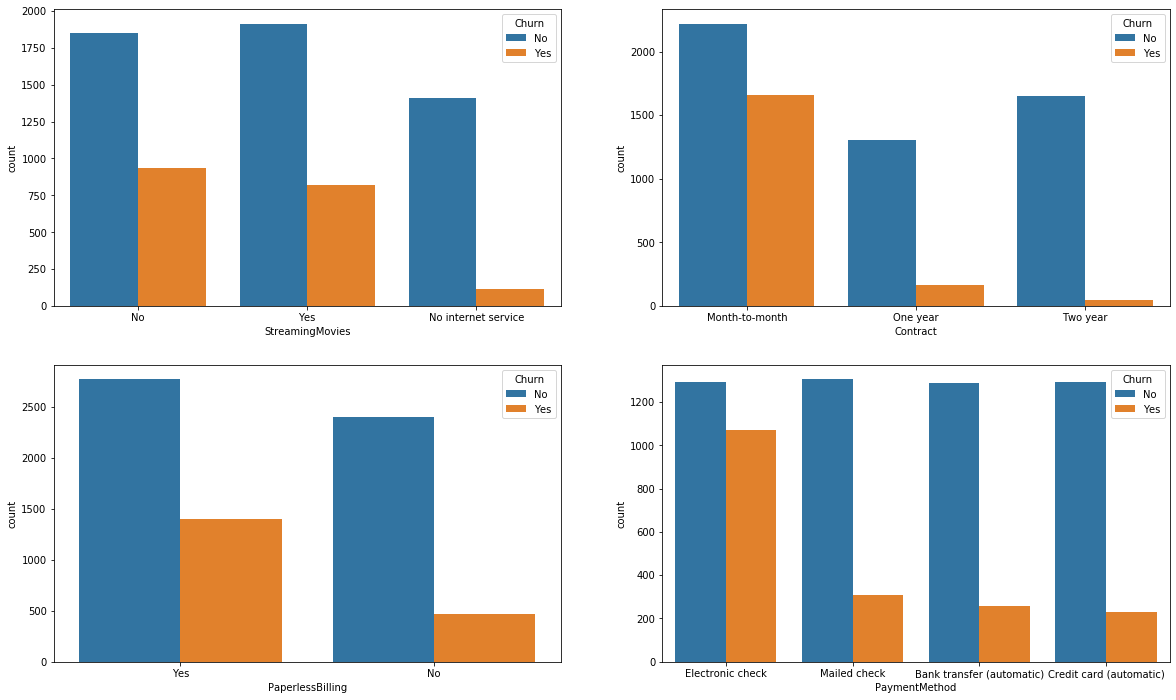

In [13]:
    import seaborn as sns
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='StreamingMovies',hue = 'Churn',data = data, ax=axarr[0][0])
    sns.countplot(x='Contract',hue = 'Churn',data = data, ax=axarr[0][1])
    sns.countplot(x='PaperlessBilling',hue='Churn',data=data,ax=axarr[1][0])
    sns.countplot(x='PaymentMethod',hue='Churn',data=data,ax=axarr[1][1])
    

From the above countplot,we can see that those employees who have a month to month contract churn more and the employees
who have a two year contract churn less.Again those employees who have no paperless billing churn less and those employees
who have a credit card churn less..

CONTINUOUS DATA ATTRIBUTES

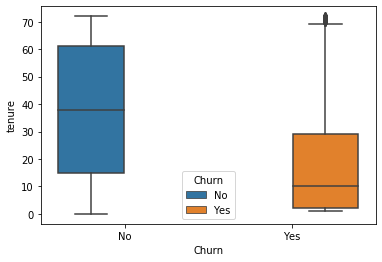

In [14]:

    sns.boxplot(y='tenure',x = 'Churn', hue = 'Churn',data = data)  

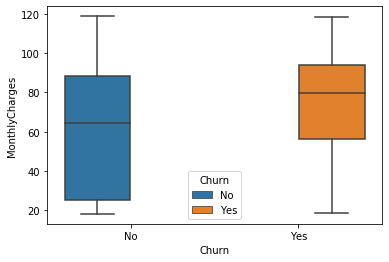

In [15]:
sns.boxplot(y='MonthlyCharges',x = 'Churn', hue = 'Churn',data = data)

From the above boxplots we can find that people who serve for a less tenure are churning more and those who have more 
monthly charges churn more..

In [16]:
# One hot encode the categorical variables
lst = ['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
      'PaperlessBilling','PaymentMethod']
y=data.iloc[:,19]
data=data.iloc[:,:19]
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
data['gender']= le.fit_transform(data['gender']) 
data['Partner']= le.fit_transform(data['Partner']) 
data['Dependents']= le.fit_transform(data['Dependents'])
data['PhoneService']= le.fit_transform(data['PhoneService'])
data['MultipleLines']= le.fit_transform(data['MultipleLines'])
data['InternetService']= le.fit_transform(data['InternetService'])
data['OnlineSecurity']= le.fit_transform(data['OnlineSecurity'])
data['DeviceProtection']= le.fit_transform(data['DeviceProtection'])
data['TechSupport']= le.fit_transform(data['TechSupport'])
data['StreamingTV']= le.fit_transform(data['StreamingTV'])
data['StreamingMovies']= le.fit_transform(data['StreamingMovies'])
data['Contract']= le.fit_transform(data['Contract'])
data['PaperlessBilling']= le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod']= le.fit_transform(data['PaymentMethod'])
data['OnlineBackup']= le.fit_transform(data['OnlineBackup'])


importing one hot encoder from sklearn


In [17]:
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 
data = onehotencoder.fit_transform(data).toarray()

Splitting the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state = 0)

In [19]:
y_train= le.fit_transform(y_train)
y_test= le.fit_transform(y_test)
y_train=onehotencoder.fit_transform((y_train).reshape(-1,1)).toarray()
y_test=onehotencoder.fit_transform((y_test).reshape(-1,1)).toarray()

Model fitting and selection

For the model fitting, I will try out the following

    Logistic regression in the primal space and with different kernels
    SVM in the primal and with different Kernels
    Ensemble models


In [20]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [21]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)


Fit best Models


In [22]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
y_train = np.argmax(y_train, axis=1)
SVM_RBF.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)

RF.fit(X_train[:,:],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(X_train[:,:],y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [27]:
print(classification_report(y_train,SVM_RBF.predict(X_train[:,:])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3876
           1       1.00      0.99      1.00      1406

    accuracy                           1.00      5282
   macro avg       1.00      1.00      1.00      5282
weighted avg       1.00      1.00      1.00      5282



In [28]:
print(classification_report(y_train,  RF.predict(X_train[:,:])))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3876
           1       0.00      0.00      0.00      1406

    accuracy                           0.73      5282
   macro avg       0.37      0.50      0.42      5282
weighted avg       0.54      0.73      0.62      5282



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
print(classification_report(y_train,XGB.predict(X_train[:,:])))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3876
           1       0.70      0.56      0.62      1406

    accuracy                           0.82      5282
   macro avg       0.77      0.74      0.75      5282
weighted avg       0.81      0.82      0.81      5282



In [31]:
y = y_train
X = X_train[:,:]
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

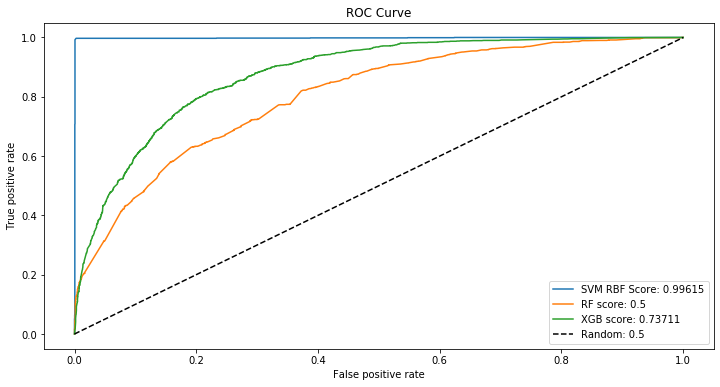

In [32]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()


From the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model..

Given that in the data we only had 26.5% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the company can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.


Test model prediction accuracy on test data

In [36]:


y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test,RF.predict(X_test[:,:])))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1298
           1       0.00      0.00      0.00       463

    accuracy                           0.74      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.74      0.63      1761



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


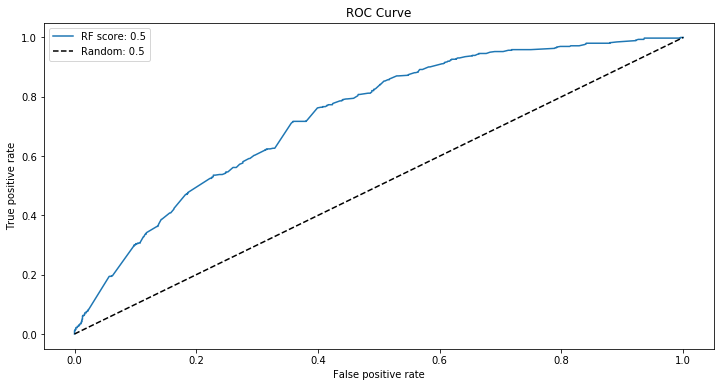

In [38]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(y_test, RF.predict(X_test[:,:]),
                                                       RF.predict_proba(X_test[:,:])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

The precision of the model on previousy unseen test data is slightly higher with regard to predicting yes i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned...